___
<a href='http://www.kgptalkie.com'><img src='kgptalkie_strips.png'/></a>
___

<center><em>Copyright by KGPTalkie</em></center>
<center><em>For free ML tutorials, visit us at <a href='http://www.kgptalkie.com'>www.kgptalkie.com</a> and <a href='http://www.youtube.com/kgptalkie'>www.youtube.com/kgptalkie</a> </em></center>

# Unsupervised Image Clustering

SentenceTransformers provides models that allow to embed images and text into the same vector space. This allows to find similar images as well as to implement image search.




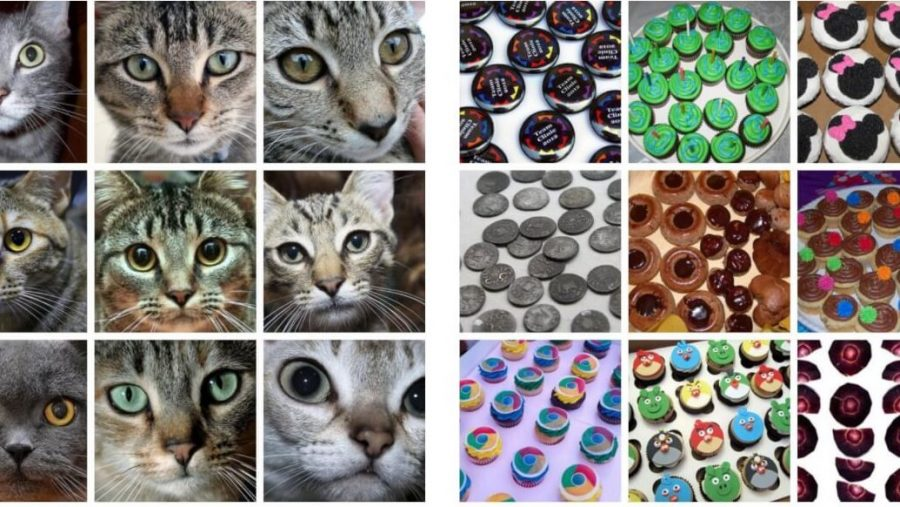

we use the OpenAI CLIP Model, which was trained on a large set of images and image alt texts.

https://github.com/openai/CLIP

we use the Unsplash Dataset Lite, which contains about 25k images.

https://unsplash.com/data

https://github.com/unsplash/datasets

http://sbert.net/datasets/

https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [ ]:
%pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.9 MB/s 
     |████████████████████████████████| 4.2 MB 28.1 MB/s 
     |████████████████████████████████| 1.2 MB 53.0 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
     |████████████████████████████████| 596 kB 58.4 MB/s 
     |████████████████████████████████| 6.6 MB 45.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=d0de61db83c7960e670b9ef043943da28634f655faf53c362dc079059f68da51
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

In [ ]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

--2022-06-08 19:12:20--  https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip
Resolving public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)... 130.83.167.186
Connecting to public.ukp.informatik.tu-darmstadt.de (public.ukp.informatik.tu-darmstadt.de)|130.83.167.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1922426838 (1.8G) [application/zip]
Saving to: ‘unsplash-25k-photos.zip’

unsplash-25k-photos 100%[===================>]   1.79G  27.4MB/s    in 74s     

2022-06-08 19:13:35 (24.8 MB/s) - ‘unsplash-25k-photos.zip’ saved [1922426838/1922426838]



In [ ]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

Streaming output truncated to the last 5000 lines.
  inflating: photos/ErnD0oSB9OE.jpg  
  inflating: photos/CLMlVwtPsI4.jpg  
  inflating: photos/7by0hnrUBP8.jpg  
  inflating: photos/XWARm1Wgg4U.jpg  
  inflating: photos/m_x26CPIjic.jpg  
  inflating: photos/Or9vxPAGtXw.jpg  
  inflating: photos/asr62h5w66w.jpg  
  inflating: photos/oPubZ53L5OE.jpg  
  inflating: photos/AENmGl9JVgs.jpg  
  inflating: photos/kR1Aer8c_WI.jpg  
  inflating: photos/YCniL3n_B7Q.jpg  
  inflating: photos/pg5CVv0FEBU.jpg  
  inflating: photos/jynDaAkI0H8.jpg  
  inflating: photos/QP64OlGcfcQ.jpg  
  inflating: photos/a_nu2fRoqwI.jpg  
  inflating: photos/HeerZLfH4h8.jpg  
  inflating: photos/7TGVEgcTKlY.jpg  
  inflating: photos/fN2pzLWtG6A.jpg  
  inflating: photos/lpxXl5Ssung.jpg  
  inflating: photos/yan5Aj6crIU.jpg  
  inflating: photos/9Phn7Dwz2PM.jpg  
  inflating: photos/9TRaDtl7Z5U.jpg  
  inflating: photos/QeZuoNqtj9I.jpg  
  inflating: photos/lLUbQBbf6Bc.jpg  
  inflating: photos/rmFs3k34JLI.jpg  

In [ ]:
img_names = list(glob.glob('photos/*.jpg'))[:2000]
print("Images:", len(img_names))

Images: 2000


In [ ]:
model = SentenceTransformer('clip-ViT-B-32')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/605M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/604 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [ ]:
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True, show_progress_bar=True)

In [ ]:
embeddings = img_embed
threshold = 0.8
min_community_size=5
init_max_size=1000

cos_scores = util.cos_sim(embeddings, embeddings)

In [ ]:
cos_scores.shape

torch.Size([2000, 2000])

In [ ]:
cos_scores

tensor([[1.0000, 0.7561, 0.7938,  ..., 0.7495, 0.6621, 0.4577],
        [0.7561, 1.0000, 0.8007,  ..., 0.7675, 0.6568, 0.4282],
        [0.7938, 0.8007, 1.0000,  ..., 0.7791, 0.6890, 0.4107],
        ...,
        [0.7495, 0.7675, 0.7791,  ..., 1.0000, 0.6263, 0.3968],
        [0.6621, 0.6568, 0.6890,  ..., 0.6263, 1.0000, 0.4457],
        [0.4577, 0.4282, 0.4107,  ..., 0.3968, 0.4457, 1.0000]],
       device='cuda:0')

In [ ]:
top_k_values, _ = cos_scores.topk(k=min_community_size, largest=True)

In [ ]:
top_k_values.shape

torch.Size([2000, 5])

In [ ]:
extracted_communities = []
for i in range(len(top_k_values)):
  if top_k_values[i][-1] >= threshold:
    new_cluster = []

    top_val_large, top_idx_large = cos_scores[i].topk(k=init_max_size, largest=True)
    top_idx_large = top_idx_large.tolist()
    top_val_large = top_val_large.tolist()

    if top_val_large[-1] < threshold:
      for idx, val in zip(top_idx_large,top_val_large):
        if val<threshold:
          break
        
        new_cluster.append(idx)
    
    else:
      for idx,val in enumerate(cos_scores[i].tolist()):
        if val>=threshold:
          new_cluster.append(idx)


    extracted_communities.append(new_cluster)


extracted_communities = sorted(extracted_communities, key=lambda x: len(x), reverse=True)



In [ ]:
len(extracted_communities)

1648

In [ ]:
# extracted_communities[0]

In [ ]:
unique_communities = []
extracted_ids = set()

for community in extracted_communities:
  add_cluster = True
  for idx in community:
    if idx in extracted_ids:
      add_cluster = False
      break

  if add_cluster:
    unique_communities.append(community)
    for idx in community:
      extracted_ids.add(idx)

In [ ]:
len(unique_communities)

26



Cluster Size:  615


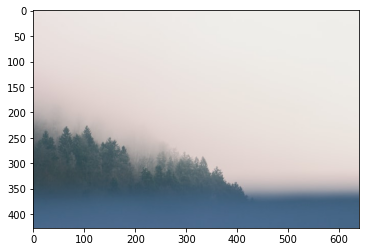

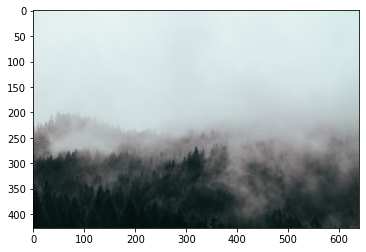

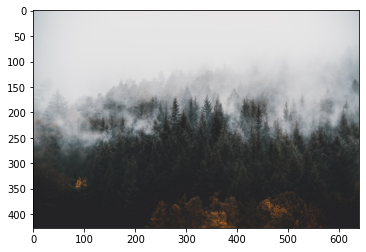



Cluster Size:  72


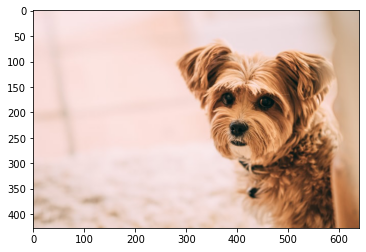

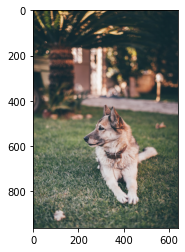

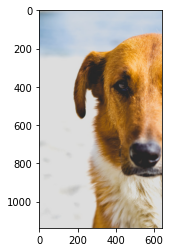



Cluster Size:  24


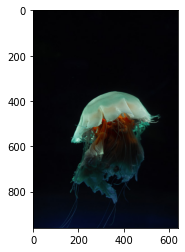

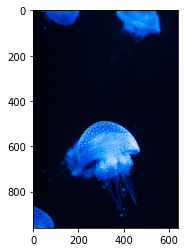

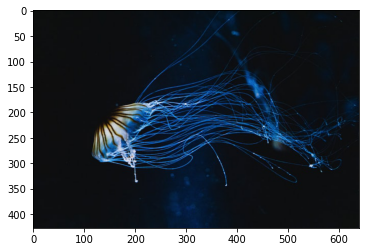



Cluster Size:  20


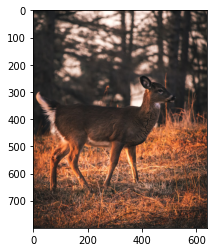

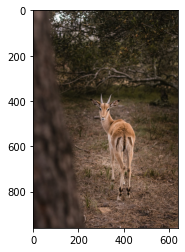

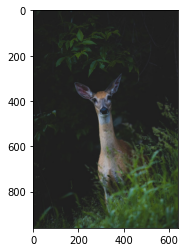



Cluster Size:  18


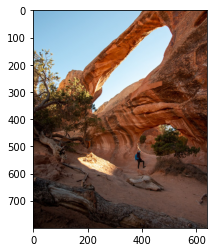

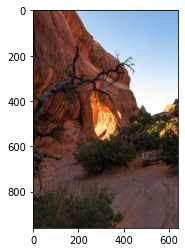

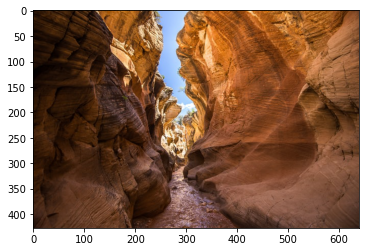



Cluster Size:  17


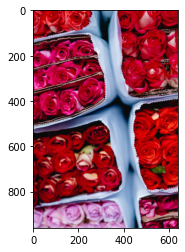

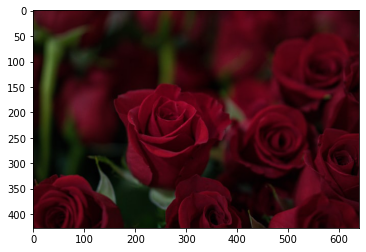

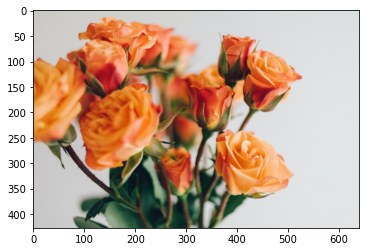



Cluster Size:  15


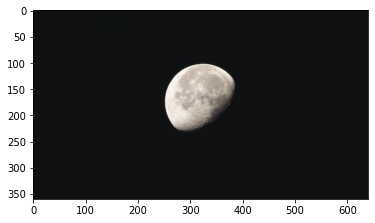

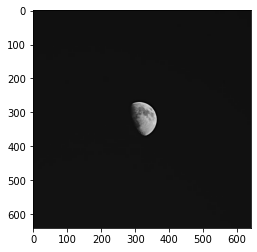

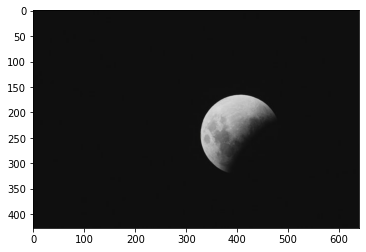



Cluster Size:  14


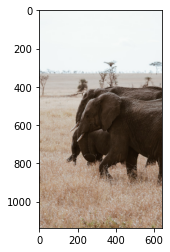

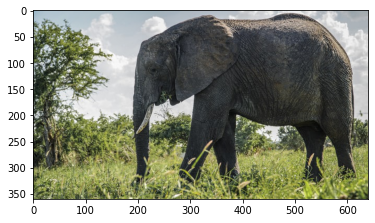

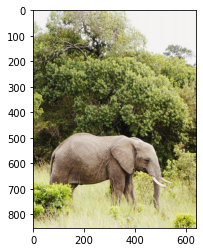



Cluster Size:  13


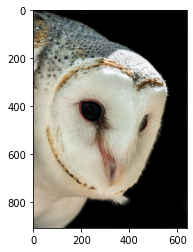

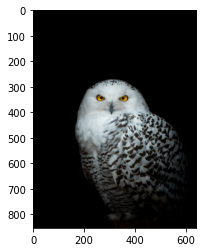

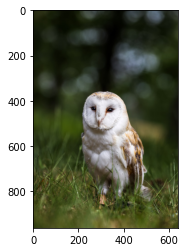



Cluster Size:  11


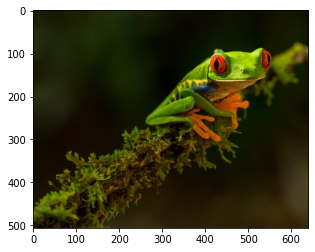

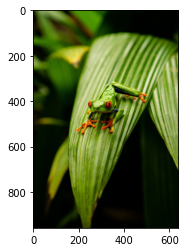

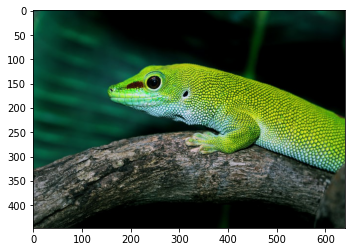

In [ ]:
for cluster in unique_communities[0:10]:
  print("\n\nCluster Size: ", len(cluster))

  for idx in cluster[0:3]:
    img_path = img_names[idx]
    im = Image.open(img_path)
    plt.figure()
    plt.imshow(im)
    plt.show()

# Other Resources
|  ML Course | Description |
|:---|:---|
| [**Data Visualization in Python Masterclass™: Beginners to Pro**](https://bit.ly/udemy95off_kgptalkie) |  Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Machine Learning: A Step-by-Step Guide**](https://bit.ly/ml-ds-project) | Learn to build Machine Learning and Deep Learning models using Python and its libraries like Scikit-Learn, Keras, and TensorFlow. |
| [**Python for Linear Regression in Machine Learning**](https://bit.ly/regression-python) | Learn to build Linear Regression models using Python and its libraries like Scikit-Learn. |
| [**Introduction to Spacy 3 for Natural Language Processing**](https://bit.ly/spacy-intro) | Learn to build Natural Language Processing models using Python and its libraries like Spacy. |
| [**Advanced Machine Learning and Deep Learning Projects**](https://bit.ly/kgptalkie_ml_projects) | Learn to build Advanced Machine Learning and Deep Learning models using Python and transformer models like BERT, GPT-2, and XLNet. |
| [**Natural Language Processing in Python for Beginners**](https://bit.ly/intro_nlp) | Learn to build Natural Language Processing Projects using Spacy, NLTK, and Gensim, and transformer models like BERT, GPT-2, and XLNet. |
| [**Deployment of Machine Learning Models in Production in Python**](https://bit.ly/bert_nlp) |  Learn to deploy Machine Learning and Deep Learning models using Python and its libraries like Flask, Streamlit, and NGINX. |
| [**R 4.0 Programming for Data Science - Beginners to Pro**](https://bit.ly/r4-ml) | Learn to build Machine Learning and Deep Learning models using R and its libraries like caret, tidyverse, and keras. |
